In [18]:
import random
import autograd.numpy as np
from autograd import grad, jacobian
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.optimize import least_squares 
import pandas as pd
from scipy import spatial
import os
import urllib.request

In [ ]:
def f(x):
  return 1 / (x ** 2 - 3 * x + 2)

In [ ]:
xk = [3 * i / 1000 for i in range(1000)]
yk = []
for i in xk:
    if (f(i)<-100):
        yk.append(-100 + np.random.normal(0, 1))
    elif ((f(i)>=-100) & (f(i)<=100)):
        yk.append(f(i) + np.random.normal(0, 1))
    else:
        yk.append(100 + np.random.normal(0, 1))

In [ ]:
def approximation_function(a, b, c, d):
    x = []
    y = []
    for k in range(1000):
        x.append(3 * k / 1000)
        y.append((a * x[k] + b) / (x[k] ** 2 + c * x[k] + d))
    return x, y

In [ ]:
def approximant_function(x,xk,yk):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    d_func = 0
    for k in range(1000):
        d_func += ((a * xk[k] + b) / (xk[k] ** 2 + c * xk[k] + d) - yk[k]) ** 2
    return d_func

In [ ]:
def approximant_function_2(x,xk,yk):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    return [((a * xk[k] + b) / (xk[k] ** 2 + c * xk[k] + d) - yk[k]) for k in range(1000)]

In [ ]:
res_nelder_mead = scipy.optimize.minimize(approximant_function, [2,2,2,2], args = (xk,yk),  method="Nelder-Mead",tol=0.001)
print(res_nelder_mead)

 final_simplex: (array([[-1.60364375,  1.60455549, -2.00102033,  1.00107064],
       [-1.60364249,  1.6045544 , -2.001021  ,  1.00107133],
       [-1.60363989,  1.60455234, -2.0010219 ,  1.00107222],
       [-1.60363708,  1.60455017, -2.00102269,  1.001073  ],
       [-1.60363946,  1.60455171, -2.00102294,  1.00107325]]), array([152091.75786671, 152091.7580839 , 152091.75821776, 152091.75847058,
       152091.75872546]))
           fun: 152091.75786670606
       message: 'Optimization terminated successfully.'
          nfev: 410
           nit: 235
        status: 0
       success: True
             x: array([-1.60364375,  1.60455549, -2.00102033,  1.00107064])


In [ ]:
res_lm = least_squares(approximant_function_2, [2,2,2,2],  args = (xk, yk), method='lm')
print(res_lm)

 active_mask: array([0, 0, 0, 0])
        cost: 68461.64312063713
         fun: array([ 4.44317985e-01,  6.38394279e-01,  7.73185869e-01,  1.23608911e+00,
       -1.07267822e+00, -6.87465713e-01,  1.89752712e+00,  3.95692682e-01,
        1.00704118e+00,  4.70018791e-01, -3.55811157e-02,  2.94393307e+00,
       -4.78434377e-01,  1.05974308e+00, -8.11240693e-01,  1.21210717e+00,
        2.70988036e+00, -6.98502995e-02,  1.01310350e+00,  9.71428387e-01,
        1.48093937e+00,  8.08992304e-01,  2.30086964e+00, -3.74785344e-01,
        1.63668330e-01,  1.46193322e+00,  1.15300678e+00, -4.67466070e-01,
        8.59785552e-01,  9.76960682e-01,  3.67058870e-01,  5.78020332e-01,
        5.35280887e-01, -7.73908411e-02,  2.10399486e+00,  2.83265338e+00,
       -1.03908972e-01, -4.26726477e-01,  3.63445750e-01, -6.66361014e-02,
        8.82307190e-01,  8.07352050e-02,  3.93268234e-01,  2.47995907e+00,
        3.51010836e-01,  1.49681592e+00, -5.86496853e-01, -3.05407320e-01,
        6.14900386e-

In [ ]:
res_dif_evoluation = scipy.optimize.differential_evolution(approximant_function, [(-2,2),(-2,2),(-2,2),(-2,2)], maxiter=1000, args = (xk,yk))
print(res_dif_evoluation)

     fun: 137390.56180447002
     jac: array([-9.90508124e+02, -1.00974576e+03,  1.64043065e+06,  5.76810134e+05])
 message: 'Optimization terminated successfully.'
    nfev: 1095
     nit: 5
 success: True
       x: array([-1.00944979,  1.00971041, -2.        ,  1.00001622])


In [ ]:
res_dual_anneling = scipy.optimize.dual_annealing(approximant_function, [(-2,2),(-2,2),(-2,2),(-2,2)], maxiter=1000, args= (xk,yk))
print(res_dual_anneling)

     fun: 137390.56335601676
 message: ['Maximum number of iteration reached']
    nfev: 9106
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-1.00944105,  1.00970168, -2.        ,  1.00001621])


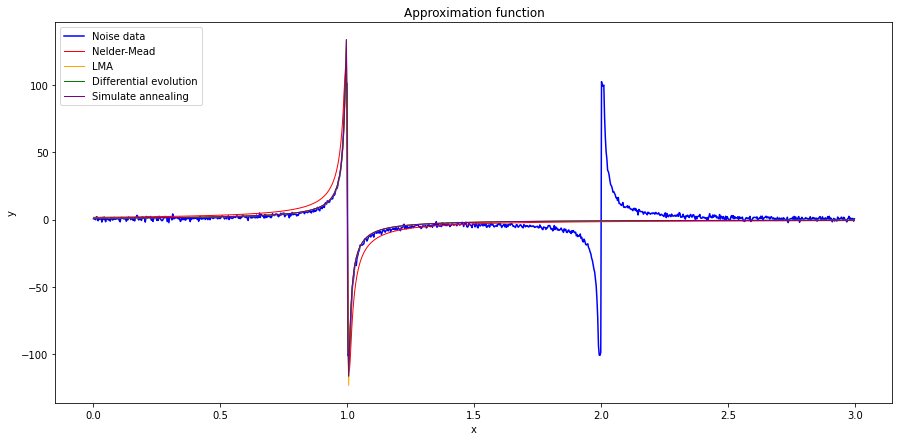

In [ ]:
plt.figure(figsize=(15,7)) 
plt.title('Approximation function')   
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(xk, yk, label = "Noise data", color='blue') # noise data 
plt.plot(approximation_function(*res_nelder_mead.x)[0],
         approximation_function(*res_nelder_mead.x)[1],
         linewidth = 1, label = "Nelder-Mead", color='red') #drew approx function
plt.plot(approximation_function(*res_lm.x)[0],
         approximation_function(*res_lm.x)[1],
         linewidth = 1, label = "LMA", color='orange') #drew approx function        
plt.plot(approximation_function(*res_dif_evoluation.x)[0],
         approximation_function(*res_dif_evoluation.x)[1],
         linewidth = 1, label = "Differential evolution", color='green') #drew approx function
plt.plot(approximation_function(*res_dual_anneling.x)[0],
         approximation_function(*res_dual_anneling.x)[1],
         linewidth = 1, label = "Simulate annealing", color='purple') #drew approx function
plt.legend(loc='upper left') #show legend
plt.show() # show plot

In [59]:
data =pd.read_table('https://people.sc.fsu.edu/~jburkardt/datasets/tsp/p01_xy.txt',sep='\t',header=None)
data.columns=['x']
data['y']=None
print(data)


                                                    x     y
0          -0.0000000400893815        0.0000000358...  None
1         -28.8732862244731230       -0.0000008724...  None
2         -79.2915791686897506       21.4033307581...  None
3         -14.6577381710829471       43.3895496964...  None
4         -64.7472605264735108      -21.8981713360...  None
5         -29.0584693142401171       43.2167287683...  None
6         -72.0785319657452987       -0.1815834632...  None
7         -36.0366489745023770       21.6135482886...  None
8         -50.4808382862985496       -7.3744722432...  None
9         -50.5859026832315024       21.5881966132...  None
10         -0.1358203773809326       28.7292896751...  None
11        -65.0865638413727368       36.0624693073...  None
12        -21.4983260706612533       -7.3194159498...  None
13        -57.5687244704708050       43.2505562436...  None
14        -43.0700258454450875      -14.5548396888...  None


In [60]:

for i in range(len(data)):
    coordinate=data['x'][i].split()
    data['x'][i]=float(coordinate[0])
    data['y'][i]=float(coordinate[1])

print(data)

              x            y
0  -4.00894e-08  3.58808e-08
1      -28.8733 -8.72412e-07
2      -79.2916      21.4033
3      -14.6577      43.3895
4      -64.7473     -21.8982
5      -29.0585      43.2167
6      -72.0785    -0.181583
7      -36.0366      21.6135
8      -50.4808     -7.37447
9      -50.5859      21.5882
10     -0.13582      28.7293
11     -65.0866      36.0625
12     -21.4983     -7.31942
13     -57.5687      43.2506
14       -43.07     -14.5548


In [61]:
data = np.array(data, dtype=float)
print(data)

[[-4.00893815e-08  3.58808126e-08]
 [-2.88732862e+01 -8.72412107e-07]
 [-7.92915792e+01  2.14033308e+01]
 [-1.46577382e+01  4.33895497e+01]
 [-6.47472605e+01 -2.18981713e+01]
 [-2.90584693e+01  4.32167288e+01]
 [-7.20785320e+01 -1.81583463e-01]
 [-3.60366490e+01  2.16135483e+01]
 [-5.04808383e+01 -7.37447224e+00]
 [-5.05859027e+01  2.15881966e+01]
 [-1.35820377e-01  2.87292897e+01]
 [-6.50865638e+01  3.60624693e+01]
 [-2.14983261e+01 -7.31941595e+00]
 [-5.75687245e+01  4.32505562e+01]
 [-4.30700258e+01 -1.45548397e+01]]


In [62]:
def initParameter():
    # custom function initParameter():
    # Initial parameter for simulated annealing algorithm
    tInitial = 100.0                # (initial temperature)
    tFinal  = 1                     # (stop temperature)
    nMarkov = 1000                  # Markov
    alfa    = 0.98                  # T(k)=alfa*T(k-1)

    return tInitial,tFinal,alfa,nMarkov

In [63]:
#  TSP 
def calTourMileage(tourGiven, nCities, distMat):
    # custom function caltourMileage(nCities, tour, distMat):
    # to compute mileage of the given tour
    mileageTour = distMat[tourGiven[nCities-1], tourGiven[0]]   # dist((n-1),0)
    for i in range(nCities-1):                                  # dist(0,1),...dist((n-2)(n-1))
        mileageTour += distMat[tourGiven[i], tourGiven[i+1]]
    return round(mileageTour)                     # 

#  TSP 
def plot_tour(tour, value, coordinates):
    # custom function plot_tour(tour, nCities, coordinates)

    num = len(tour)
    x0, y0 = coordinates[tour[num - 1]]
    x1, y1 = coordinates[tour[0]]
    plt.scatter(int(x0), int(y0), s=50, c='g')      #  C(n-1)
    plt.plot([x1, x0], [y1, y0], c='g')             #  C(n-1)~C(0)
    for i in range(num - 1):
        x0, y0 = coordinates[tour[i]]
        x1, y1 = coordinates[tour[i + 1]]
        plt.scatter(int(x0), int(y0), s=50, c='g')  #  C(i)
        plt.plot([x1, x0], [y1, y0], c='g')         #  C(i)~C(i+1)

    plt.xlabel("Total mileage of the tour:{:.1f}".format(value))
    plt.title("Optimization tour of TSP")  # 
    plt.show()

In [64]:
def mutateSwap(tourGiven, nCities):
    # custom function mutateSwap(nCities, tourNow)
    # produce a mutation tour with 2-Swap operator
    # swap the position of two Cities in the given tour

    #  [0,n)  2 i,j
    i = np.random.randint(nCities)          #  [0,n) 
    while True:
        j = np.random.randint(nCities)      #  [0,n) 
        if i!=j: break                      #  i, j 

    tourSwap = tourGiven.copy()             #  tourSwap
    tourSwap[i],tourSwap[j] = tourGiven[j],tourGiven[i] #   i  j 

    return tourSwap

In [65]:
dist_matrix = spatial.distance.squareform(spatial.distance.pdist(data))
print(dist_matrix)

[[ 0.         28.87328618 82.1295141  45.79849678 68.35011083 52.07763703
  72.07876065 42.02125099 51.01664308 54.99985252 28.72961069 74.40942465
  22.71017112 72.00533761 45.46284727]
 [28.87328618  0.         54.77323131 45.65889733 42.0294171  43.21712639
  43.20562732 22.76970077 22.83131915 30.61842557 40.63513355 51.10678263
  10.3905666  51.9041315  20.33201291]
 [82.1295141  54.77323131  0.         68.27098377 45.67884946 54.76485788
  22.75821988 43.25544102 40.72125656 28.70627175 79.49404898 20.41256484
  64.53724725 30.80882467 51.03911193]
 [45.79849678 45.65889733 68.27098377  0.         82.28880098 14.4017681
  72.08044953 30.51642286 62.13115503 42.02537331 20.63514769 50.95834147
  51.16827962 42.91121141 64.53534188]
 [68.35011083 42.0294171  45.67884946 82.28880098  0.         74.25388901
  22.92068345 52.1303075  20.35850286 45.73410383 82.08396924 57.96163378
  45.6400092  65.54302469 22.88726771]
 [52.07763703 43.21712639 54.76485788 14.4017681  74.25388901  0.


In [66]:
dist_matrix = spatial.distance.squareform(spatial.distance.pdist(data))
tInitial,tFinal,alfa,nMarkov = initParameter()
nCities = data.shape[0]             #   nCities
nMarkov = nCities                   #   Markov 
tNow    = tInitial                  #   (current temperature)

In [67]:
tourNow   = np.arange(nCities)   # 01n 
valueNow  = calTourMileage(tourNow, nCities, dist_matrix) #  valueNow
tourBest  = tourNow.copy()                          #  tourNow
valueBest = valueNow                                #  valueNow
recordBest = []                                     #  
recordNow  = []                                     #

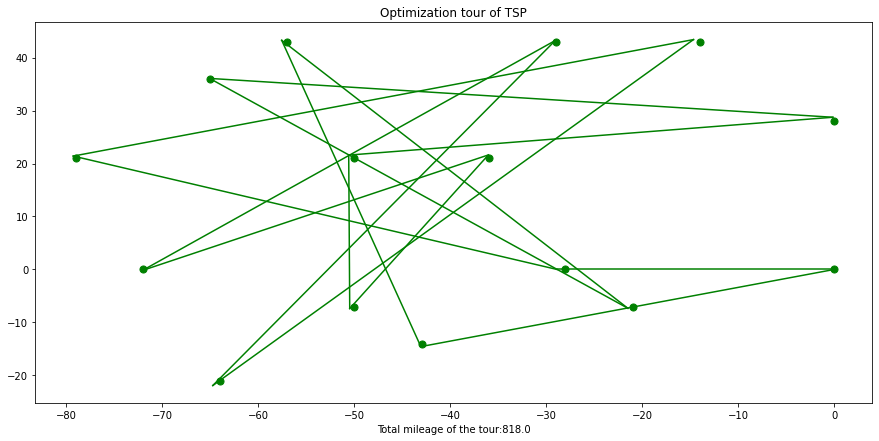

In [68]:
plt.figure(figsize=(15, 7)) 
plot_tour(tourBest, valueBest, data)

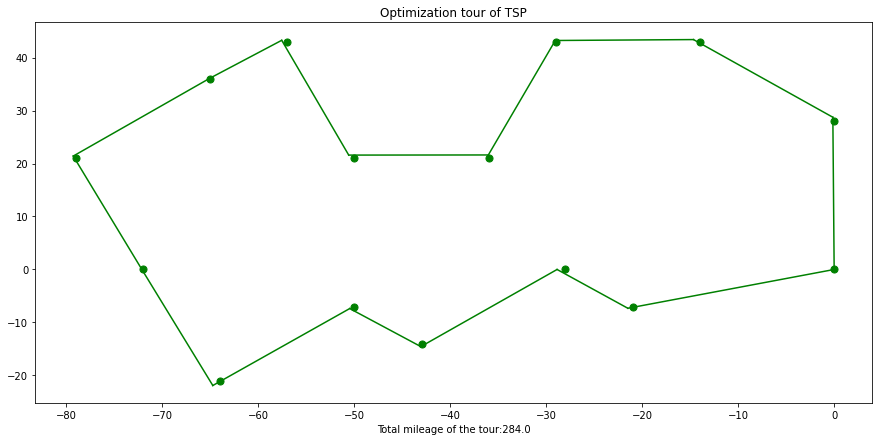

Best tour: 
 [13 11  2  6  4  8 14  1 12  0 10  3  5  7  9]
Best value: 284.0


In [58]:
iter = 0                        # 
while tNow >= tFinal:           # 
    # (nMarkov)

    for k in range(nMarkov):    # Markov
        # 
        tourNew = mutateSwap(tourNow, nCities)      #   
        # tourNew,deltaE = mutateSwapE(tourNow,nCities,distMat)   #    deltaE
        valueNew = calTourMileage(tourNew, nCities, dist_matrix) # 
        deltaE = valueNew - valueNow

        #  Metropolis 
        if deltaE < 0:                          # 
            accept = True
            if valueNew < valueBest:            # 
                tourBest[:] = tourNew[:]
                valueBest = valueNew
        else:                                   # 
            pAccept = math.exp(-deltaE/tNow)    # 
            if pAccept > random.random():
                accept = True
            else:
                accept = False

        # 
        if accept == True:                      # 
            tourNow[:] = tourNew[:]
            valueNow = valueNew

    #  0,n-1
    tourNow = np.roll(tourNow,2)                # 

    # 
    recordBest.append(valueBest)                #  
    recordNow.append(valueNow)                  #  
    print('i:{}, t(i):{:.2f}, valueNow:{:.1f}, valueBest:{:.1f}'.format(iter,tNow,valueNow,valueBest))

    # 
    iter = iter + 1
    tNow = tNow * alfa                              # T(k)=alfa*T(k-1)

# 

# 
plt.figure(figsize=(15, 7))      #  1
plot_tour(tourBest, valueBest, data)

print("Best tour: \n", tourBest)
print("Best value: {:.1f}".format(valueBest))